In [35]:
%config Completer.use_jedi = False

In [1]:
from PIL import Image

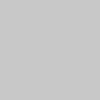

In [28]:
Image.new("RGB", (100,100), (200,200,200))

In [4]:
import numpy as np

In [5]:
%pip install -q scipy

In [29]:
%pip install -q matplotlib

In [30]:
import matplotlib.pyplot as plt

In [11]:
from time import time

In [12]:
from sklearn.cluster import KMeans
#from sklearn.datasets import load_sample_image
#from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [13]:
# Load jpg | # Load the Summer Palace photo
raw_jpg = Image.open("img.jpg").convert("RGB")

In [15]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by 255 is important so that plt.imshow behaves well on float data (needs to be in the range [0-1])
jpg_float = np.array(raw_jpg, dtype=np.float64) / 255

In [140]:
jpg_float

array([[[0.24705882, 0.30980392, 0.26666667],
        [0.28235294, 0.34509804, 0.29411765],
        [0.3254902 , 0.38039216, 0.32941176],
        ...,
        [0.38431373, 0.39607843, 0.36078431],
        [0.3372549 , 0.34117647, 0.30980392],
        [0.28627451, 0.29019608, 0.25882353]],

       [[0.31764706, 0.38039216, 0.3372549 ],
        [0.32941176, 0.39215686, 0.34901961],
        [0.35686275, 0.41176471, 0.36078431],
        ...,
        [0.4       , 0.41176471, 0.37647059],
        [0.38431373, 0.38823529, 0.35686275],
        [0.36470588, 0.36862745, 0.3372549 ]],

       [[0.3254902 , 0.37647059, 0.3372549 ],
        [0.32941176, 0.38039216, 0.34117647],
        [0.33333333, 0.38039216, 0.33333333],
        ...,
        [0.4       , 0.41176471, 0.37647059],
        [0.40784314, 0.41568627, 0.37254902],
        [0.4       , 0.40784314, 0.36470588]],

       ...,

       [[0.55686275, 0.55686275, 0.44705882],
        [0.56078431, 0.57254902, 0.45882353],
        [0.56078431, 0

In [16]:
# Load Image and transform to a 2D numpy array
width, height, depth = original_shape = tuple(jpg_float.shape)
assert depth == 3
image_array = np.reshape(jpg_float, (width * height, depth))

In [17]:
# ^Basically width * height no. of rows and depth no. of columns (3)
image_array[:10, :]

array([[0.24313725, 0.31372549, 0.26666667],
       [0.28235294, 0.34509804, 0.30196078],
       [0.3254902 , 0.38039216, 0.32941176],
       [0.38431373, 0.43137255, 0.37647059],
       [0.39607843, 0.43921569, 0.37647059],
       [0.39215686, 0.42745098, 0.36078431],
       [0.36470588, 0.4       , 0.33333333],
       [0.36470588, 0.39607843, 0.3372549 ],
       [0.36862745, 0.41176471, 0.34901961],
       [0.34117647, 0.38823529, 0.34117647]])

In [18]:
n_colors = 6

In [19]:
# ^Model training on small sub-sample of the data
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.076s.


In [20]:
# Get labels for all points | ^Use the trained model to give each pixel a colour category (one of n_colors)
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (k-means)
done in 0.116s.


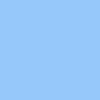

In [21]:
Image.new("RGB", (100,100), (150,200,250))

In [61]:
np.array([150,50,250])/255

array([0.58823529, 0.19607843, 0.98039216])

In [55]:
# ^Define n_colors
# purple = np.array([150,50,250])/255
# orange = [0.5,0.2,0]
# green = [0.1,1,0.1]
# yellow = [1,1,0]
# cyan = [0,1,0.8]
# pink = [1,0,1]

In [22]:
purple = np.array([150,50,250])/255
orange = np.array([250,150,0])/255
lime = np.array([200,250,0])/255
yellow = np.array([250,250,0])/255
skyblue = np.array([150,200,250])/255
fuschia = np.array([250,100,250])/255

In [23]:
# ^Arrange n_colors in an np.array assiged to codebook variable
codebook = np.array([ orange, skyblue, lime, yellow,  purple, fuschia])

In [24]:
codebook

array([[0.98039216, 0.58823529, 0.        ],
       [0.58823529, 0.78431373, 0.98039216],
       [0.78431373, 0.98039216, 0.        ],
       [0.98039216, 0.98039216, 0.        ],
       [0.58823529, 0.19607843, 0.98039216],
       [0.98039216, 0.39215686, 0.98039216]])

In [25]:
# ^Make function to recreate the (compressed) image from the code book and labels
def recreate_image(codebook, labels, width, height):
    return codebook[labels].reshape(width, height, -1)

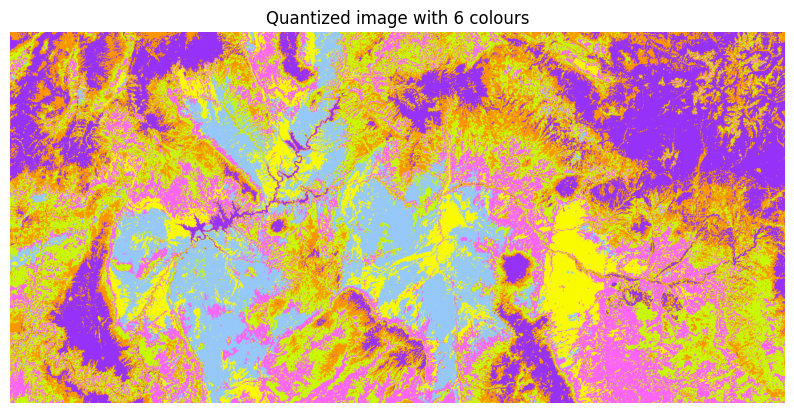

In [31]:
# ^Create and plot recreated image
SatArt = recreate_image(codebook, labels, width, height)
plt.figure(figsize=(10,10))
plt.clf()
plt.axis("off")
plt.title(f"Quantized image with {n_colors} colours")
plt.imshow(SatArt)
#plt.savefig("SatArt_test.png", dpi=600)

In [32]:
from PIL.ImageFilter import (RankFilter, MedianFilter, MinFilter, MaxFilter, CONTOUR, EMBOSS)

In [33]:
from PIL.ImageOps import ( autocontrast, solarize, invert)

In [34]:
# ^Turn np.array back into 8 bit integer coding
quantized_png = Image.fromarray((SatArt * 255).astype(np.uint8))

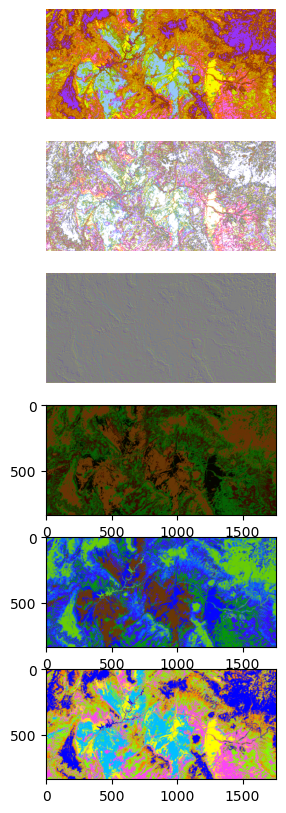

In [35]:
# ^Apply PIL filter/s
fig, ax = plt.subplots(6,1, figsize=(10,10))
ax[0].imshow(quantized_png.filter(MinFilter()))
ax[1].imshow(quantized_png.filter(CONTOUR()))
ax[2].imshow(quantized_png.filter(EMBOSS()))
ax[0].axis("off")
ax[1].axis("off")
ax[2].axis("off")
ax[3].imshow(solarize(quantized_png))
ax[4].imshow(invert(quantized_png))
ax[5].imshow(autocontrast(quantized_png))
# ax[1].imshow(quantized_png.filter(CONTOUR()))
# ax[2].imshow(quantized_png.filter(EMBOSS()))
# ax[0].axis("off")
# ax[1].axis("off")
# ax[2].axis("off")
plt.show()

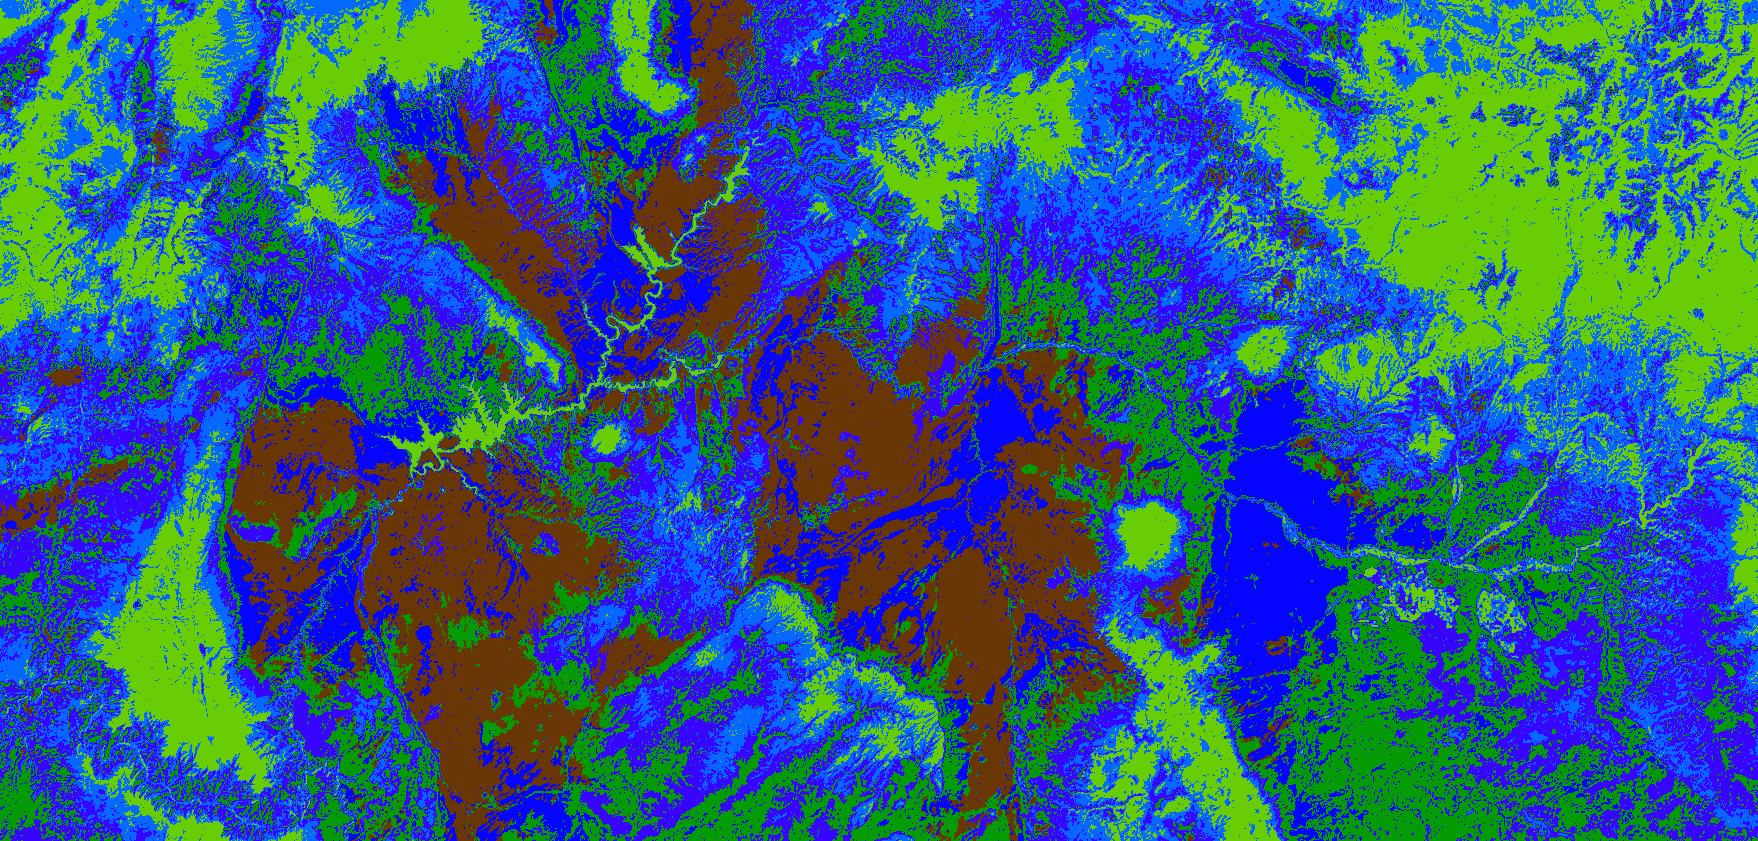

In [36]:
invert(quantized_png)

In [37]:
PILfiltered = invert(quantized_png)

PILfiltered.save("invert0.png")

In [ ]:
n_colors = 6

# Load the Summer Palace photo
china = Image.open("dell_bol_jpg.jpg").convert("RGB")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

blue = [0.2,0.1,1]
orange = [0.5,0.2,0]
green = [0.1,1,0.1]
yellow = [1,1,0]
cyan = [0,1,0.8]
pink = [1,0,1]

codebook_random = np.array([ blue, yellow, pink, orange, cyan, green  ])
#codebook_random = np.array([[0,0,1], [0.5,0.2,0], [0.4,1,0], [1,0,0.4], [1,0,0.8], [1,0,1] ])
# codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
#labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# # Display all results, alongside original image
# plt.figure(1)
# plt.clf()
# plt.axis("off")
# plt.title("Original image (96,615 colors)")
# plt.imshow(china)

# plt.figure(2)
# plt.clf()
# plt.axis("off")
# plt.title(f"Quantized image ({n_colors} colors, K-Means)")
# plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

SatArt = recreate_image(codebook_random, labels, w, h)
plt.figure(figsize=(10,10))
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(SatArt)
#plt.imshow(recreate_image(codebook_random, labels, w, h))
#plt.savefig("SatArt_test0.png", dpi=600)
#plt.show()